In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
dataset=pd.read_csv("student_scores.csv")
print(dataset.head())
dataset.info()

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


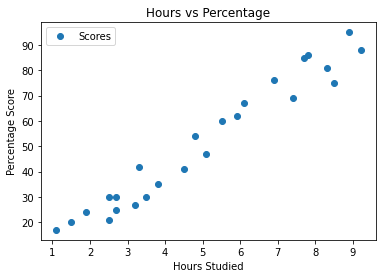

In [8]:
#visualizing data set
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [251]:
#splitting data
y_train=np.array(dataset["Scores"][:20]).reshape((20,1))
X0_train=np.ones((20,1))
X1_train=dataset['Hours'][:20]
X_train=np.column_stack((X0_train,X1_train))
X0_test=np.ones((5,1))
X1_test=dataset['Hours'][20:]
X_test=np.column_stack((X0_test,X1_test))
y_test=np.array(dataset["Scores"][20:]).reshape((5,1))

# using the normal equation method

In [252]:
#y=a0+a1x1 for one feature linear regression a=(XT.X)-1.(XT.y)
theta=np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),np.matmul(X_train.T,y_train))
theta

array([[3.03128304],
       [9.52038609]])

### the values of a0 and a1 have been found

In [255]:
y_pred=np.matmul(X_train,theta)

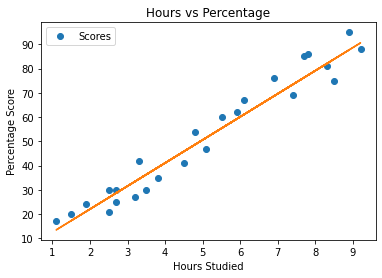

In [257]:
#visualizing data set
dataset.plot(x='Hours', y='Scores', style='o')
plt.plot(X1_train,y_pred)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


# Evaluation 

In [260]:
from sklearn.metrics import mean_absolute_error
y_pred_test=np.matmul(X_test,theta)
mean_absolute_error(y_test,y_pred_test)

5.346209347444646

# predicting a new value

In [261]:
def prediction(x):
    return np.matmul(np.column_stack((1,x)),theta)[0]

In [262]:
print("predicted value for 9.25 hours is ",prediction(9.25))

predicted value for 9.25 hours is  [91.09485442]


# gradient descent method

In [228]:
#lets write some functions

In [263]:
def cost(theta,X,y):
    j= np.sum((y-np.matmul(X,theta))**2)/(2*len(X))
    return j

In [264]:
def update(theta,X,y,alpha):
    theta=theta - (np.sum((np.matmul(X,theta)-y)*X,axis=0).reshape(2,1)/len(X))*alpha
    return theta

In [265]:
def linear_reggresor(theta,X,y,alpha,epochs):
    for i in range(epochs):
        print("epoch:",i)
        print("cost before the iteration : ",cost(theta,X,y))
        theta=update(theta,X,y,alpha)
    return theta

In [266]:
#y=a0+a1x1 randomly giving any starting point 
theta=np.array([10,15]).reshape((2,1))

In [267]:
theta=linear_reggresor(theta,X_train,y_train,.001,20000)

epoch: 0
cost before the iteration :  699.38125
epoch: 1
cost before the iteration :  656.2322789977816
epoch: 2
cost before the iteration :  615.815683194792
epoch: 3
cost before the iteration :  577.9584307564185
epoch: 4
cost before the iteration :  542.4984473560053
epoch: 5
cost before the iteration :  509.2839222737509
epoch: 6
cost before the iteration :  478.17265843796366
epoch: 7
cost before the iteration :  449.0314636259588
epoch: 8
cost before the iteration :  421.73558021809595
epoch: 9
cost before the iteration :  396.16815106352584
epoch: 10
cost before the iteration :  372.21971917080924
epoch: 11
cost before the iteration :  349.78775908140227
epoch: 12
cost before the iteration :  328.7762379196378
epoch: 13
cost before the iteration :  309.0952042398952
epoch: 14
cost before the iteration :  290.6604029106552
epoch: 15
cost before the iteration :  273.39291438661996
epoch: 16
cost before the iteration :  257.2188168244797
epoch: 17
cost before the iteration :  242.0

In [268]:
y_pred_G=np.matmul(X_train,theta)

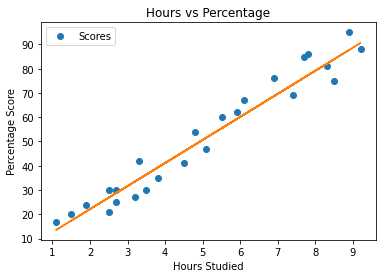

In [270]:
#visualizing data set
dataset.plot(x='Hours', y='Scores', style='o')
plt.plot(X1_train,y_pred_G)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [271]:
theta

array([[3.12144402],
       [9.50602966]])

# Evaluation

In [272]:
y_pred_test_G=np.matmul(X_test,theta)
print("here is error",mean_absolute_error(y_test,y_pred_test_G))

5.344944449510512

In [275]:
print("finally predicting the value",prediction(9.25)[0])

finally predicting the value 91.05221834989966
